In [86]:
#import
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import datetime
from scipy import stats 
from datetime import datetime, timedelta
import time
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import sqlite3
import re
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from operator import itemgetter
from sklearn.tree import DecisionTreeClassifier

# This is the downloaded CSV file. Load it in.
mnist_csv = np.genfromtxt(r"Data\mnist_data.csv", delimiter=",")

# Split into features and target
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)
df = pd.DataFrame(data=mnist_csv)

# Question 1

Preprocess the data.

Visualize one element from each class.

Visualize the mean of each class.

In [2]:
df.head(5) #checking shape of data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Columns: 785 entries, 0 to 784
dtypes: float64(785)
memory usage: 209.6 MB


In [4]:
#preprocess, check for erroneous data
nacheck = df.isna().sum()
typecheck= df.dtypes
any0 = []
anytype = []

for i,n in zip(nacheck, typecheck):
    if i != 0:
        any0.append(i)
    if n != 'float64':
        anytype.append(n)
print(any0)
print(anytype)

[]
[]


No NaN values or incorrect dtypes were found. 

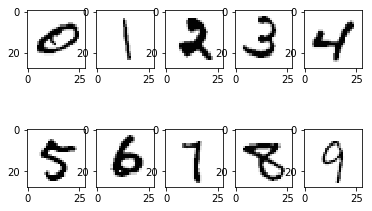

In [5]:
count = 0
array = [0,2,3,2,6,8]
numbers = []
for index, row in df.iterrows():
    x = int(row[-1:])
    if x == count:
        numbers.append(row)
        count+=1
    else:
        pass
    if count ==10:
        break

fig, axs = plt.subplots(2,5)
axs = axs.ravel()
for i,row in zip(range(10),numbers):
    pixels = row[:-1]
    newarray = []
    for x in range(0,28,1):
        newarray.append(pixels[x*28:(x*28+28)])
    axs[i].imshow(newarray, cmap='Greys')
plt.show()

Took one row from dataframe for each "class" (0-9) and visualized each by rearranging 1-D array to 2-D array for visualization.

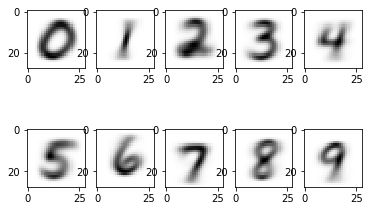

In [6]:
fig, axs = plt.subplots(2,5)
axs = axs.ravel()
for i in range(10):
    x = df.loc[df[784]==i]
    x = x.drop(784, axis=1)
    d = x.mean()
    newarray = []
    for x in range(0,28,1):
        newarray.append(d[x*28:(x*28+28)])
    axs[i].imshow(newarray, cmap='Greys')
plt.show()

Visualized averages of each class. Images are less distinct but clearly able to differentiate between classes.

# Question 2

Fit a logistic regression model to this data with its solver set to be the 'lbfgs' algorithm. (You can try using other solvers if you’d like, but this is one of the fastest ones.)

a) Reduce the dimensionality of your data using Principal Component Analysis.

b) What does reducing the dimensionality do to the computation time and why? What does reducing the number of data points do to the computation time and why?

c) List one advantage and disadvantage of reducing dimensionality. List one advantage and disadvantage of reducing the number of data points.

In [2]:
#not reduced dimensionality log reg
start_time = time.time()
logrbase = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(X_train,y_train)
timetake = time.time() - start_time
print(timetake)

4.70842719078064


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


3.4seconds runtime without dimensionality reduction

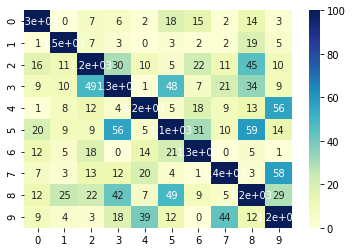

In [3]:
y_pred = logrbase.predict(X_test)

cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

In [9]:
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

0.9072142857142858
[0.9623733719247467, 0.968284789644013, 0.8832853025936599, 0.8936761640027797, 0.9155134741442098, 0.8312597200622084, 0.9484386347131445, 0.918918918918919, 0.8497790868924889, 0.8870262390670554]


Overall accuracy is 90.7%, pretty good.
Model predicts the number 1 most accurately. 3,5,8 classes show noticable performance below the average.


In [10]:
#dimensionality reduction log reg 
start_time = time.time()
pca = PCA(n_components =10)
pca.fit(X_train)
XtrainPCA = pca.transform(X_train)
XtestPCA = pca.transform(X_test)
print(time.time()-start_time)

3.431206226348877


In [11]:
start_time = time.time()
logrbase = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(XtrainPCA,y_train)
timetake = time.time() - start_time
print(timetake)

2.5970559120178223


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


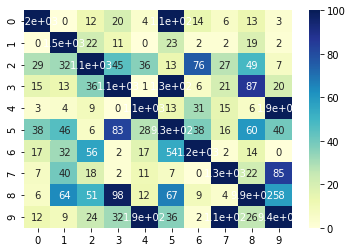

In [12]:
y_pred = logrbase.predict(XtestPCA)

cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

In [13]:
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

0.8054285714285714
[0.8683068017366136, 0.9475728155339805, 0.7737752161383286, 0.7692842251563586, 0.8018936635105608, 0.723950233281493, 0.8591140159767611, 0.8702702702702703, 0.7282768777614138, 0.684402332361516]


From the %timeit cells, we can see reducing dimensionality reduces computing time of creating a model because there are less features for the modelling algorithm to go through and create coefficients for. In this case, runtime for creating the logreg model went from 3.4 seconds to 1.2.

The more dimensions in PCA, the longer the run time. The total computing time to create the PCA dimensions and the regression model may not be reduced.

Reducing number of data points also reduces computation time because less data is considered in the model.

We notice that the overall accuracy of the model has drastically decreased after PCA dimensionality reduction. This can be expected; however the effect can be reduced if we attempt to optimize the number of components in PCA 

In [4]:
#increasing PCA component number
start_time = time.time()
pca = PCA(n_components =80)
pca.fit(X_train)
XtrainPCA = pca.transform(X_train)
XtestPCA = pca.transform(X_test)
print(time.time()-start_time)

1.912982702255249


In [15]:
start_time = time.time()
logrbase = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(XtrainPCA,y_train)
print(time.time()-start_time)

2.8795814514160156


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


We see increasing n_components increases time taken to generate PCA features and logreg model time increases slightly.

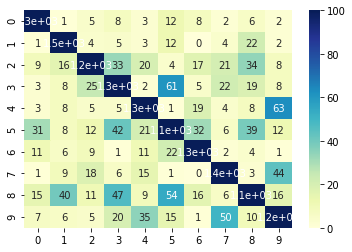

In [16]:
y_pred = logrbase.predict(XtestPCA)

cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

In [17]:
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

0.9099285714285714
[0.9659913169319826, 0.9656957928802589, 0.8832853025936599, 0.8936761640027797, 0.9155134741442098, 0.8421461897356143, 0.9513435003631082, 0.9344594594594594, 0.8424153166421208, 0.891399416909621]


We see that the accuracy of the model has improved dramatically, reaching a similar accuracy to our base model, actually improving slighly. 91% to 90.7% overall. However the total time taken is approaching the time taken for non-reduction regression.

In [25]:
#increasing PCA component number
start_time = time.time()
pca = PCA(n_components =300)
pca.fit(X_train)
XtrainPCA = pca.transform(X_train)
XtestPCA = pca.transform(X_test)
print(time.time()-start_time)

5.216556072235107


In [26]:
start_time = time.time()
logrbase = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(XtrainPCA,y_train)
print(time.time()-start_time)

3.6919238567352295


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


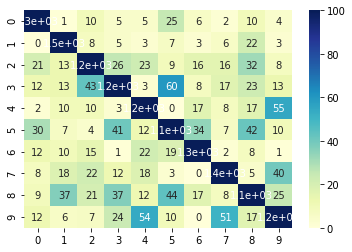

In [27]:
y_pred = logrbase.predict(XtestPCA)

cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

In [28]:
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

0.9002142857142857
[0.9507959479015919, 0.9631067961165048, 0.8818443804034583, 0.8665740097289785, 0.9110787172011662, 0.854587869362364, 0.934640522875817, 0.9149223497636731, 0.845360824742268, 0.8680758017492711]


We see adding too many PCA dimensions can reduce model accuracy.

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


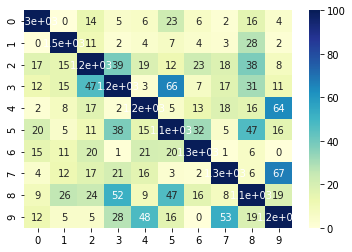

0.8922857142857142
[0.9450072358900145, 0.9605177993527508, 0.8638328530259366, 0.8547602501737318, 0.8943148688046647, 0.8530326594090202, 0.9310094408133623, 0.900067521944632, 0.845360824742268, 0.8644314868804664]


In [24]:
#check scalar transform impact on log reg
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
scalarmodel = stand.fit(X_train)
X_strain = scalarmodel.transform(X_train)
X_stest = scalarmodel.transform(X_test)
logrbase = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(X_strain,y_train)
y_pred = logrbase.predict(X_stest)
cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

Standard Scalar transform did not improve the effectiveness of the model. I have decided to opt out of applying standard scalar transforms after attempting several tests on different linear regression models and KNN models. There was not a significant improvement in model effectiveness. In most cases, the scaled model tends to perform worse than the non-scaled model.

I believe standard scalar transform is unnecessary for this dataset because all the features in this dataset are pixels that sit on the same scale between 0 and 255. Standard scalar is generally necessary when features have drastically different means and variances. 

Attempts to normalize datasets with 150,180,200 thresholds did not have significant impact on model accuracy and usually worsened model performance so normalization was omitted as well.

# Question 3

a) Train two KNN classifiers to model the data: one where K=1 and one where K=the number of training points. For each model, evaluate its accuracy on the training set and on the test set.
Can you explain the results you see?

b) Based on your results from Question 3a, try to find an ideal number of neighbors for your KNN classifier. For each value of K that you explore, evaluate the accuracy of the model on the training set and on the test set. What seems to be an ideal value for K, and why is it ideal? (Note: This will take a long time computationally.
Some tips:
You can subset the dataset to make it smaller
You can consider ways to reduce the data’s dimensionality
You do not need to explore every possible K-value. You can use your best judgement to find a suitable range of values to explore, but justify your choices.)

c) Build another model to predict which digit is written, this time using a decision tree. Instead of controlling for the K-value, control for the depth of the tree. Document your model-fitting and model-evaluation process clearly.


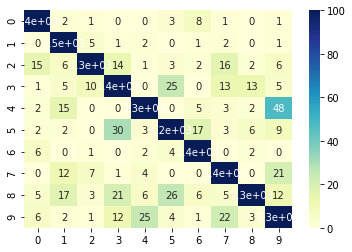

0.9607857142857142
[0.9884309472161966, 0.9922330097087378, 0.9531700288184438, 0.9499652536483669, 0.9453352769679301, 0.9440124416796267, 0.9891067538126361, 0.9695945945945946, 0.9256259204712813, 0.9446064139941691]


In [5]:
from sklearn.neighbors import KNeighborsClassifier

knnmodel1 = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)

y_pred1 = knnmodel1.predict(X_test)

cfm = confusion_matrix(y_test, y_pred1)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()
correct = []
total = []

for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

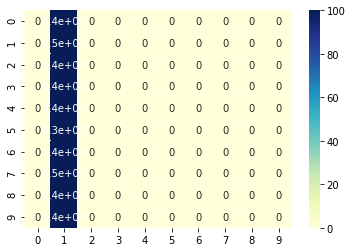

0.11035714285714286
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [15]:
knnmodelx = KNeighborsClassifier(n_neighbors=21000).fit(X_train,y_train)
y_predx = knnmodelx.predict(X_test)
cfm = confusion_matrix(y_test, y_predx)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

From the results, we can see having too many neighbor classes is extremely detrimental to modelling. The accuracy for where n_neighbors = 1 is quite high at 96% overall, but it is likely a result of overfitting. Though the model still performs well in this test split, it may not necessarily perform equally well in a k-fold cross validation and it may not perform well if further test sets were introduced. 

The classifier where n_neighbors is equal to the total data points in the set, 21000, the model is unable to distinguish between classes because all data points are considered to be close to one class. In this case, it selects all as class "1"- which has the largest percent makeup of the dataset. 

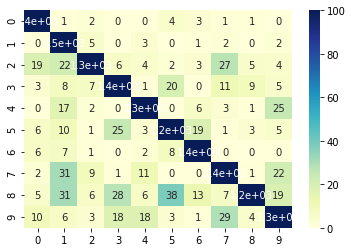

0.9532857142857143
[0.9913169319826338, 0.9915857605177993, 0.9337175792507204, 0.9555246699096595, 0.9606413994169096, 0.9432348367029549, 0.9825708061002179, 0.9480081026333559, 0.8873343151693667, 0.9329446064139941]


In [16]:
#knn without scaling or dimensionality reduction
knnmodelx = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
y_predx = knnmodelx.predict(X_test)
cfm = confusion_matrix(y_test, y_predx)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

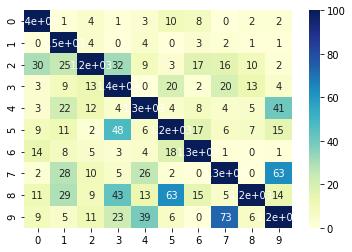

0.9241428571428572
[0.9775687409551375, 0.9902912621359223, 0.8962536023054755, 0.9416261292564281, 0.9249271137026239, 0.9059097978227061, 0.9607843137254902, 0.9081701553004726, 0.8512518409425626, 0.8746355685131195]


In [23]:
#standard scalar
knnmodelx = KNeighborsClassifier(n_neighbors=10).fit(X_strain,y_train)
y_predx = knnmodelx.predict(X_stest)
cfm = confusion_matrix(y_test, y_predx)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

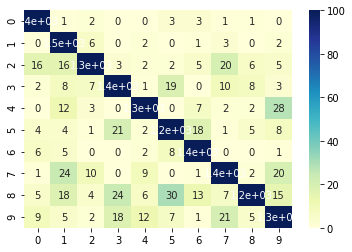

0.9595
[0.992040520984081, 0.9909385113268608, 0.9459654178674352, 0.9596942321056289, 0.9606413994169096, 0.9502332814930016, 0.9840232389251997, 0.9547602970965564, 0.9101620029455081, 0.9416909620991254]


In [18]:
#PCA 80 dimensions, with 10 nearest neighbors
pca = PCA(n_components =80)
pca.fit(X_train)
XtrainPCA = pca.transform(X_train)
XtestPCA = pca.transform(X_test)
knnmodelx = KNeighborsClassifier(n_neighbors=10).fit(XtrainPCA,y_train)
y_predx = knnmodelx.predict(XtestPCA)
cfm = confusion_matrix(y_test, y_predx)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

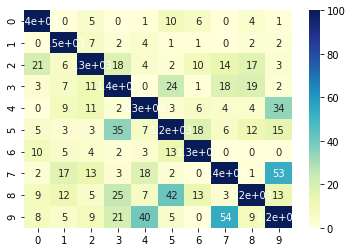

0.9407857142857143
[0.9804630969609262, 0.9877022653721683, 0.9315561959654178, 0.9409312022237665, 0.9467930029154519, 0.9191290824261276, 0.9731299927378358, 0.9264010803511141, 0.9050073637702504, 0.8899416909620991]


In [19]:
#Standard Scalar transform with PCA and 10 neighbors
pca = PCA(n_components =80)
pca.fit(X_strain)
XstrainPCA = pca.transform(X_strain)
XstestPCA = pca.transform(X_stest)
knnmodelx = KNeighborsClassifier(n_neighbors=10).fit(XstrainPCA,y_train)
y_predx = knnmodelx.predict(XstestPCA)
cfm = confusion_matrix(y_test, y_predx)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()
correct = []
total = []
for x,i in zip(cfm, range(10)):
    correct.append(x[i])
    total.append(sum(x))
ovracc = sum(correct)/sum(total)
invacc = []
for q,r in zip(correct, total):
    invacc.append(q/r)
print(ovracc)
print(invacc)

Checking scalar transform impact on KNN classifier. Results support previous assertion that standard scalar transform is negatively impacting classifers for this dataset.

In [32]:
#Attempting to find optimal PCA and n_neighbor values, first controlling for n_neighbors
PCAperformance=[]
for i in range(10,200,10):
    pca = PCA(n_components =i)
    pca.fit(X_strain)
    XstrainPCA = pca.transform(X_strain)
    XstestPCA = pca.transform(X_stest)
    knnmodelx = KNeighborsClassifier(n_neighbors=10).fit(XstrainPCA,y_train)
    y_predx = knnmodelx.predict(XstestPCA)
    cfm = confusion_matrix(y_test, y_predx)
    correct = []
    total = []
    for x,i in zip(cfm, range(10)):
        correct.append(x[i])
        total.append(sum(x))
    ovracc = sum(correct)/sum(total)
    PCAperformance.append(ovracc)
print(PCAperformance)

[0.9011428571428571, 0.9332142857142857, 0.9399285714285714, 0.9427857142857143, 0.9422142857142857, 0.942, 0.9412857142857143, 0.9415, 0.9409285714285714, 0.9397142857142857, 0.9397857142857143, 0.9384285714285714, 0.9376428571428571, 0.9368571428571428, 0.9362142857142857, 0.9359285714285714, 0.9355714285714286, 0.9347142857142857, 0.9336428571428571]


In [87]:
X_train, X_remainder, y_train, y_remainder = train_test_split(X, y, test_size=0.5, stratify = y)
X_validate, X_test, y_validate, y_test = train_test_split(X_remainder, y_remainder, test_size=0.5, stratify = y_remainder)
#validation for hyperparameter optimization

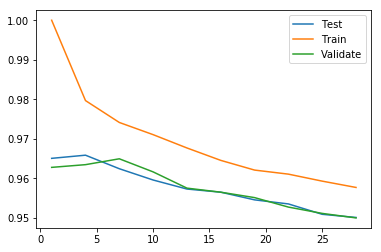

In [54]:
#attempted nested for loop to search for optimal combination of PCA and neighbor values, but computation time was taking longer than one night
#decided to keep PCA at optimal range from test where n-neighbors was controlled and find optimal n_neighbor for that value of PCA
hold=[]
for n in range(1,30,3):
    pca = PCA(n_components =40)
    pca.fit(X_train)
    XtrainPCA = pca.transform(X_train)
    XtestPCA = pca.transform(X_test)
    XvPCA = pca.transform(X_validate)
    knnmodelx = KNeighborsClassifier(n_neighbors=n).fit(XtrainPCA,y_train)
    y_predtest = knnmodelx.predict(XtestPCA)
    y_predtrain = knnmodelx.predict(XtrainPCA)
    y_predv = knnmodelx.predict(XvPCA)
    ylist = [y_predtest, y_predtrain, y_predv]
    ycheck = [y_test, y_train, y_validate]
    row = [n]
    for item,nxt in zip(ylist,ycheck):
        cfm = confusion_matrix(nxt, item)
        correct = []
        total = []
        for x,i in zip(cfm, range(10)):
            correct.append(x[i])
            total.append(sum(x))
        ovracc = sum(correct)/sum(total)
        row.append(ovracc)
    hold.append(row)
t = np.array(hold).transpose()
plt.plot(t[0], t[1], label = 'Test')
plt.plot(t[0], t[2], label = 'Train')
plt.plot(t[0], t[3], label = 'Validate')
plt.legend()
plt.show()

From this graph, it suggests when PCA dimension is 40, k-cluster is most optimal around 5, less overfitting on training data, highest values of tet and validation predictions. The higher k neighbors seems to reduce accuracy beyond that point.

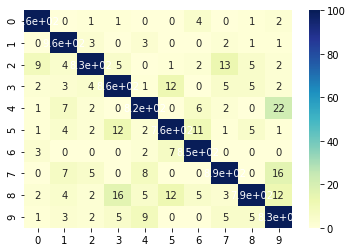

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       864
         1.0       0.97      0.99      0.98       966
         2.0       0.98      0.95      0.96       868
         3.0       0.96      0.96      0.96       899
         4.0       0.96      0.95      0.96       858
         5.0       0.96      0.95      0.96       804
         6.0       0.97      0.99      0.98       861
         7.0       0.97      0.96      0.96       925
         8.0       0.97      0.93      0.95       848
         9.0       0.93      0.96      0.95       857

   micro avg       0.96      0.96      0.96      8750
   macro avg       0.96      0.96      0.96      8750
weighted avg       0.96      0.96      0.96      8750



In [56]:
pca = PCA(n_components =40)
pca.fit(X_train)
XtrainPCA = pca.transform(X_train)
XtestPCA = pca.transform(X_test)
knnmodelx = KNeighborsClassifier(n_neighbors=5).fit(XtrainPCA,y_train)
y_predx = knnmodelx.predict(XtestPCA)
cfm = confusion_matrix(y_test, y_predx)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

print(sk.metrics.classification_report(y_test, y_predx))

This is the classifier with the best results we have seen so far. It beats the logit, decision tree classifier and the gridsearched optimized logit classifier that are determined further below. 

It has very good results for all classes, only showing some issues identifying class 8. The optimal k-value for this cluster is 5 because I reduced the dimensionality of the data by PCA to 40 dimensions. With less features, our clusters can be smaller and maintain a high degree of accuracy. 

Because of how similar the image data can be, the higher k-value will cause clusters to add images from the wrong class if the clusters are too large. Many pixels overlap between classes. 

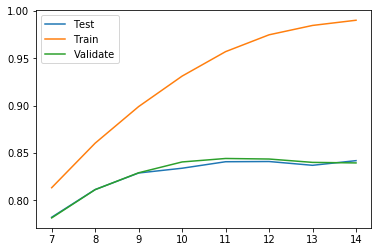

In [24]:
from operator import itemgetter
from sklearn.tree import DecisionTreeClassifier
hold = []
for j in range(7,15, 1):
    DTm = DecisionTreeClassifier(max_depth=j).fit(X_train,y_train)
    y_predtest = DTm.predict(X_test)
    y_predtrain = DTm.predict(X_train)
    y_predv = DTm.predict(X_validate)
    ylist = [y_predtest, y_predtrain, y_predv]
    ycheck = [y_test, y_train, y_validate]
    row = [j]
    for item,nxt in zip(ylist,ycheck):
        cfm = confusion_matrix(nxt, item)
        correct = []
        total = []
        for x,i in zip(cfm, range(10)):
            correct.append(x[i])
            total.append(sum(x))
        ovracc = sum(correct)/sum(total)
        row.append(ovracc)
    hold.append(row)
t = np.array(hold).transpose()
plt.plot(t[0], t[1], label = 'Test')
plt.plot(t[0], t[2], label = 'Train')
plt.plot(t[0], t[3], label = 'Validate')
plt.legend()
plt.show()
#Tested for max_depth range of 5 to 80 with step size of 5. Narrowed optimal range to 7-15

Max_depth seems to be most optimal at 10, with no noticeable improvements inunknown data prediction beyond this point.

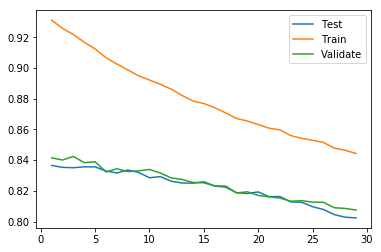

In [28]:
hold = []


for q in range(1,30, 1):
    DTm = DecisionTreeClassifier(max_depth=10, min_samples_leaf=q).fit(X_train,y_train)
    y_predtest = DTm.predict(X_test)
    y_predtrain = DTm.predict(X_train)
    y_predv = DTm.predict(X_validate)
    ylist = [y_predtest, y_predtrain, y_predv]
    ycheck = [y_test, y_train, y_validate]
    row = [q]
    for item,next in zip(ylist,ycheck):
        cfm = confusion_matrix(next, item)
        correct = []
        total = []
        for x,i in zip(cfm, range(10)):
            correct.append(x[i])
            total.append(sum(x))
        ovracc = sum(correct)/sum(total)
        row.append(ovracc)
    hold.append(row)
t = np.array(hold).transpose()
plt.plot(t[0], t[1], label = 'Test')
plt.plot(t[0], t[2], label = 'Train')
plt.plot(t[0], t[3], label = 'Validate')
plt.legend()
plt.show()


Increasing min_samples_leaf decreases the accuracy of the model. 

In [29]:
#Determine if PCA with specific depth may help model
max_depth_sort=[]
for o in range(10,100,10):
    for n in range(2,20, 2):
        pca = PCA(n_components =o)
        pca.fit(X_train)
        XtrainPCA = pca.transform(X_train)
        XtestPCA = pca.transform(X_test)
        DTm = DecisionTreeClassifier(max_depth=i).fit(XtrainPCA,y_train)
        y_predx = DTm.predict(XtestPCA)
        cfm = confusion_matrix(y_test, y_predx)
        correct = []
        total = []
        for x,i in zip(cfm, range(10)):
            correct.append(x[i])
            total.append(sum(x))
        ovracc = sum(correct)/sum(total)
        max_depth_sort.append([o, n, ovracc])
max_depth_sort.sort(key=itemgetter(2), reverse=True)
print(max_depth_sort)


[[30, 10, 0.7514285714285714], [30, 16, 0.7507428571428572], [20, 2, 0.7505142857142857], [20, 8, 0.7505142857142857], [20, 18, 0.7505142857142857], [30, 8, 0.7502857142857143], [20, 4, 0.7500571428571429], [30, 14, 0.7500571428571429], [30, 18, 0.7500571428571429], [20, 10, 0.7499428571428571], [30, 4, 0.7499428571428571], [20, 14, 0.7498285714285714], [20, 6, 0.7497142857142857], [30, 2, 0.7497142857142857], [20, 16, 0.7491428571428571], [30, 6, 0.7491428571428571], [30, 12, 0.7491428571428571], [40, 10, 0.7486857142857143], [40, 6, 0.7485714285714286], [40, 14, 0.7484571428571428], [20, 12, 0.7483428571428571], [40, 12, 0.7482285714285715], [40, 18, 0.748], [40, 2, 0.7478857142857143], [50, 8, 0.7476571428571429], [40, 4, 0.7475428571428572], [60, 2, 0.7475428571428572], [40, 8, 0.7474285714285714], [60, 4, 0.7474285714285714], [40, 16, 0.7473142857142857], [60, 14, 0.7473142857142857], [50, 10, 0.7472], [50, 4, 0.7470857142857142], [50, 6, 0.7470857142857142], [60, 8, 0.74708571428

All PCA results showed decrease in accuracy relative to non-PCA models, regardless of depth. Highest accuracy was 75% with 30 PCA dimensions and a max depth of 10 wheras the best performing model was a max depth of 10 with an accuracy of 84%

For this classifier, my results support an optimal max depth hyperparamater as 10. This number showed the best performance in test and validation datasets without increasing overfit on training data. Numbers above 10 do not improve test and validation performance, but improve training prediction more - leading to overfitting. Changes to min_sample_leaf decreased performance in all datasets.

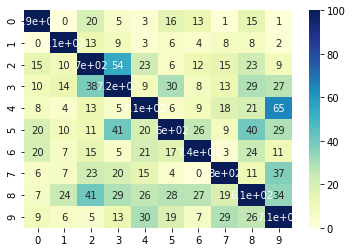

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       864
         1.0       0.92      0.95      0.93       966
         2.0       0.80      0.81      0.80       868
         3.0       0.80      0.80      0.80       899
         4.0       0.83      0.83      0.83       858
         5.0       0.82      0.74      0.78       804
         6.0       0.87      0.86      0.87       861
         7.0       0.87      0.87      0.87       925
         8.0       0.76      0.72      0.74       848
         9.0       0.77      0.83      0.80       857

   micro avg       0.83      0.83      0.83      8750
   macro avg       0.83      0.83      0.83      8750
weighted avg       0.83      0.83      0.83      8750



In [35]:
DTm = DecisionTreeClassifier(max_depth=10).fit(X_train,y_train)
y_predx = DTm.predict(X_test)
cfm = confusion_matrix(y_test, y_predx)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

print(sk.metrics.classification_report(y_test, y_predx))

From the results of this confusion matrix, we can see the accuracy of this model still has a lot to be desired. It does not perform as well as a KNN model and it is not necessarily the higheset performing Decision tree classifier. However, this is the optimal level of accuracy in test prediction without overfitting the model too much to the training set. I decided to forgo higher accuracy in testing prediction for a model with less bias.

From this confusion matrix we see 2's are misclassified as 3's and vice versa fairly often. 8's are misclassified the most in this model. This trend can be observed from the 8th row, where misclassification numbers are much higher than other rows and it fits the individual accuracy calculated at 72.5% accuracy, the lowest of all classes. "1" class is misclassified the least and has the highest individual accuracy of 94%. This model is weak at classifying 5's and 8's, misclassifies 2's and 3's as each other often and 4's are misclassified as 9's at a very high rate.

# Question 4

a) Fit a logistic regression model and use 5-fold cross-validation to optimize its hyperparameters. For each hyperparameter that you’re tuning, describe what it controls in your model. What are the optimal hyperparameters that you found?

b) What does the confusion matrix look like for your best model? Interpret the confusion matrix. Where is your model strongest and weakest? (Suggestion: Use Seaborn’s sns.heatmap() to plot the confusion matrix with the argument ‘annot=True’.)

c) Re-fit a linear model that can discriminate between the digit 4 and the digit 9. Visualize the weights of the model as an image. What can you learn from this image about how your classifier distinguishes 4s from 9s?

In [38]:
#hyperparameters - C- regularization parameter, max_iter, solver, penalty
"""LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)"""
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import cross_val_score, GridSearchCV

From the function arguments we can see there are many options to tinker with but I will focus on the solver, regularization parameter and the max_iter variable.

The solver will impact how the model performs but liblinear will not be considered because it cannot handle multi-class problems. newton-cg, lbfgs, SAG, SAGA are solvers that can compute multiclassification. 

The penalty function affects how the dataset is regularized; however, certain solvers are only compatible with certain penalty functions. newton-cg, lbfgs, SAG handle L2 (ridge) penalty. SAGA uses L1.

C is a regularization parameter that determines how much impact a regularization function has on the impact of a model. Because it is the inverse of regularization strength, a smaller value will give a regularization function higher strength.

max_iter is the max number of iteration for the solver to converge. The default setting is at 100 but it may be necessary to increase the max_iter variable to allow the solver to converge for solvers that take longer to converge. SAG and SAGA are fast convergers.

I chose not to include PCA because it would increase the computation time by several magnitudes to find optimal PCA values in addition to the other hyperparameters and it did not improve model accuracy much in previous models.

In [48]:
#i will perform two gridsearch to accomodate the different solvers that are only compatible with a specific penalty function 
# so SAGA will have its own individual gridsearch with a L1 penalty function
pipe = Pipeline([('log',LogisticRegression())])
param_grid1 = {
    'log__solver':['newton-cg', 'lbfgs', 'sag'], 
    'log__C':[0.001, 0.01, 0.1, 1, 10, 100],
    'log__penalty':['l2'],
    'log__max_iter':[100]
}


gs1 = GridSearchCV(pipe,param_grid = param_grid1, cv=5)
fs1 = gs1.fit(X_train,y_train)



D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklea

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklea

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklea

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converg

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklea

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logi

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converg

In [41]:
param_grid2 = {
    'log__solver':['saga'], 
    'log__C':[0.001, 0.01, 0.1, 1, 10, 100],
    'log__penalty':['l1'],
    'log__max_iter':[100]
}
gs2 = GridSearchCV(pipe,param_grid = param_grid2, cv=5)
fs2 = gs2.fit(X_train,y_train)


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converg

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converg

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converg

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this wa

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\An

D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converg

In [61]:
print(fs1.score(X_test,y_test))
print(fs1.score(X_train,y_train))
print(fs1.score(X_validate,y_validate))
print(fs1.best_estimator_)
print(fs1.cv_results_['mean_test_score'])



0.9032
0.9409142857142857
0.9042285714285714
Pipeline(memory=None,
     steps=[('log', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False))])
[0.89205714 0.89194286 0.90177143 0.88051429 0.886      0.90177143
 0.86782857 0.88445714 0.90154286 0.85937143 0.88428571 0.9016
 0.85645714 0.88411429 0.90171429 0.85531429 0.88337143 0.90177143]


In [62]:
print(fs2.score(X_test,y_test))
print(fs2.score(X_train,y_train))
print(fs2.score(X_validate,y_validate))
print(fs2.best_estimator_)
print(fs2.cv_results_['mean_test_score'])

0.9049142857142857
0.9374857142857143
0.908
Pipeline(memory=None,
     steps=[('log', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))])
[0.9044     0.90748571 0.90228571 0.90182857 0.9016     0.90154286]


D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


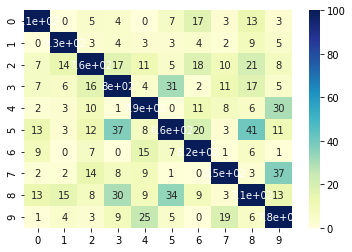

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       864
         1.0       0.95      0.97      0.96       966
         2.0       0.91      0.87      0.89       868
         3.0       0.88      0.89      0.88       899
         4.0       0.90      0.92      0.91       858
         5.0       0.88      0.82      0.84       804
         6.0       0.91      0.95      0.93       861
         7.0       0.93      0.92      0.93       925
         8.0       0.85      0.84      0.85       848
         9.0       0.87      0.92      0.89       857

   micro avg       0.90      0.90      0.90      8750
   macro avg       0.90      0.90      0.90      8750
weighted avg       0.90      0.90      0.90      8750



In [63]:
#best model with saga solver, penalty l1, c=0.01
logrbase = LogisticRegression(solver='saga',multi_class='multinomial', C=0.01).fit(X_train,y_train)
y_pred = logrbase.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

print(sk.metrics.classification_report(y_test, y_pred))

This log regression model struggles most with classifying 5 and 8 images, lowest precision recall and f1-score. This is common through all of the models tested - knn,dt,logit. From the confusion matrix we see images are most often misclassified as 6, 8 and 9. This is expected as these classes have very circular figures that could match the circular shapes in other numbers.

The model is strongest at identifying class 0 and 1. These images are generally distinguishable from other classes because their pixel layout is very different. The 0 class has no pixels in a middle area where most numbers would have pixels. The 1 is just a line of pixels down the center of the image. I'm actually rather surprised that there were so few 1 classes that were misclassified as 7's.

In [75]:
#refitting linear model on class 4 and 9 only
df49 = df.loc[(df[784]==4) | (df[784]==9)]
df49.info()
# Split into features and target
X1 = df49.loc[:, df49.columns != 784]
y1 = df49[784]

# Split into training & test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, stratify = y1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6860 entries, 7 to 34994
Columns: 785 entries, 0 to 784
dtypes: float64(785)
memory usage: 41.1 MB


D:\Anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


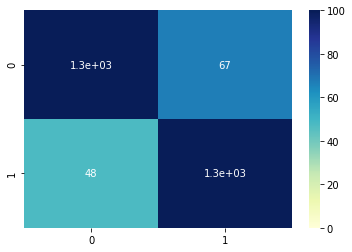

              precision    recall  f1-score   support

         4.0       0.96      0.95      0.96      1372
         9.0       0.95      0.97      0.96      1372

   micro avg       0.96      0.96      0.96      2744
   macro avg       0.96      0.96      0.96      2744
weighted avg       0.96      0.96      0.96      2744



In [78]:
logrbase = LogisticRegression(solver='saga',multi_class='multinomial', C=0.01).fit(X1_train,y1_train)
y1_pred = logrbase.predict(X1_test)
cfm = confusion_matrix(y1_test, y1_pred)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(2)], columns=[i for i in range(2)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

print(sk.metrics.classification_report(y1_test, y1_pred))

In [84]:
weights = logrbase.coef_.tolist()[0]


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.221230397362828e-07, -1.063720937266252e-06, -1.420917677672044e-06, -1.1276026709960764e-06, -1.0831516399940796e-06, -8.762441826401711e-07, 0.0, -5.8576018249245235e-08, -3.6537516333687475e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1790203822052364e-09, -9.660360550972038e-09, -9.660360550972038e-09, -3.5789451902750515e-06, -1.1623658064781954e-05, -8.40041002338039e-06, -4.739025349977448e-06, -0.00015797575861213183, -0.0003275017673329574, -5.258497617767829e-05, -1.8036175409944295e-05, -8.944922856466904e-05, -5.616303332749817e-05, -4.303725226786863e-05, -3.453763301751927e-05, -1.016176855372733e-05, -5.60

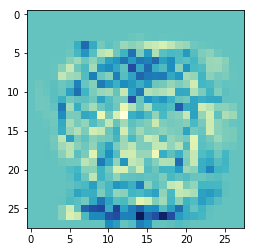

In [90]:
newarray = []
for x in range(0,28,1):
    newarray.append(weights[x*28:(x*28+28)])
plt.imshow(newarray,cmap='YlGnBu')
plt.show()

Pixels with darker color have higher positive weight. Lighter pixels have negative coefficients. The negative coefficients are more centered and seem to have a diagonal line through the center of the image where one might expect a 4 to have. The dark pixels are more spread out around the center in a circular fashion which seems to resemble a 9's curved figure. The left-ward tail of the 9's likely have very low overlap with 4 shapes where the line to the bottom is on the right side which is why they are weighted so strongly. Similarly the pixels with lightest color are in a region where one might expect a hole in the top of the 9 figure, which is where a 4's diagonal slash would sit on an image.

# Question 5

The goal for this question is to find a model that gives the maximum predictive accuracy on this classification task. You are free to choose any type of model(s) you like. Optimize its hyperparameters (if it has any), document your process, and provide visualizations that demonstrate your model’s performance. Save your model by exporting it as a .pkl file.

We’re going to hold a competition! We have additional handwritten digit data that isn’t included in this assignment’s dataset. We’ll test all the submitted models on the unseen data and showcase the top 3 in class.

In [105]:
#we know log regression max's out in effectiveness around 91%, DecisionTree is awful at 84%, and KNN at 95-96%
#I will now explore some additional classification methods to see if they can beat KNN
# SVM, ensemble method - XGBoost, and CNN basic structure
from sklearn.svm import SVC
from skopt.optimizer import forest_minimize
from skopt.optimizer import gbrt_minimize
from skopt.optimizer import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score
from skopt.plots import plot_convergence

X_train, X_remainder, y_train, y_remainder = train_test_split(X, y, test_size=0.5, stratify = y)
X_validate, X_test, y_validate, y_test = train_test_split(X_remainder, y_remainder, test_size=0.5, stratify = y_remainder)



In [ ]:
space  = [Real(10**-3, 10**2, "log-uniform", name='C'),
          Real(10**-3, 10**2, "log-uniform", name='gamma'),
          Real(10**-3, 10**2, "log-uniform", name='coef0'),
          Integer(1, 100, name='degree')]
svmp = SVC(kernel = 'poly', random_state=0)
@use_named_args(space)
def objective(**params):
    svmp.set_params(**params)

    return -np.mean(cross_val_score(svmp, X_train, y_train, cv=3, n_jobs=-1, scoring="neg_mean_absolute_error"))

svmpres = gp_minimize(objective, space, n_calls=50, random_state = 0)
print(svmpres.fun)
plot_convergence(svmpres)
# svmr = SVC(kernel = 'rbf', random_state=0)
# svms = SVC(kernel = 'sigmoid', random_state=0)
# param_gridsvm = {
#     'svm__kernel':['poly','rbf','sigmoid'], 
#     'svm__C':[0.001, 0.01, 0.1, 1, 10, 100],
#     'svm__gamma':[0.001, 0.01, 0.1, 1, 10, 100],
#     'svm__coef0':[0.001, 0.01, 0.1, 1, 10, 100],
#     'svm__degree':[.003,0.3,3,30,90,300]
# }


# gsvm = GridSearchCV(svmpipe,param_grid = param_gridsvm, cv=3)
# fsvm = gsvm.fit(X_train,y_train)

In [92]:
print(fsvm.score(X_test,y_test))
print(fsvm.score(X_train,y_train))
print(fsvm.score(X_validate,y_validate))
print(fsvm.best_estimator_)
print(fsvm.cv_results_['mean_test_score'])

# Moderate improvement on best KNN classifier found. Best classifier I have tested so far, 'poly kernal','C=.001'

0.9629714285714286
1.0
0.9659428571428571
Pipeline(memory=None,
     steps=[('svm', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])
[0.91114286 0.9616     0.11034286 0.11034286 0.91114286 0.9616
 0.11034286 0.11034286 0.91114286 0.9616     0.11034286 0.11034286
 0.91114286 0.9616     0.11034286 0.11034286 0.91114286 0.9616
 0.11034286 0.11034286 0.91114286 0.9616     0.11034286 0.1104    ]


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


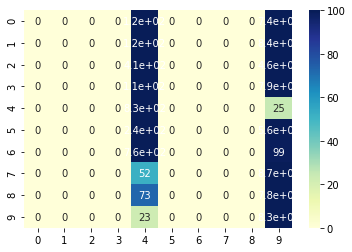

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       864
         1.0       0.00      0.00      0.00       966
         2.0       0.00      0.00      0.00       868
         3.0       0.00      0.00      0.00       899
         4.0       0.30      0.97      0.46       858
         5.0       0.00      0.00      0.00       804
         6.0       0.00      0.00      0.00       861
         7.0       0.00      0.00      0.00       925
         8.0       0.00      0.00      0.00       848
         9.0       0.14      0.97      0.24       857

   micro avg       0.19      0.19      0.19      8750
   macro avg       0.04      0.19      0.07      8750
weighted avg       0.04      0.19      0.07      8750



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
import xgboost as xgb
import pickle
from sklearn.externals import joblib

svm = SVC(kernel='poly', C=0.001).fit(X_train,y_train)
y_pred = logrbase.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
df_cfm = pd.DataFrame(cfm, index = [i for i in range(10)], columns=[i for i in range(10)])

sns.heatmap(df_cfm, annot=True, cmap='YlGnBu', vmin=0, vmax=100)
plt.show()

print(sk.metrics.classification_report(y_test, y_pred))

In [ ]:
pca = PCA(n_components =40)
pca.fit(X_train)
XtrainPCA = pca.transform(X_train)
XtestPCA = pca.transform(X_test)
knnbest = KNeighborsClassifier(n_neighbors=5).fit(XtrainPCA,y_train)
joblib.dump(knnbest,'knnbest.sav')

In [ ]:
#xgboost attempts

In [ ]:
#cnn attempts